In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
ourGenre = 'Documentary'

In [3]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080684,0
1,1,tt0080684,0
2,2,tt0080684,0
3,3,tt0080377,0
4,4,tt0080377,0
...,...,...,...
1209,1209,tt4414694,1
1210,1210,tt3504604,1
1211,1211,tt4109204,1
1212,1212,tt5105784,1


In [4]:
genre = []
poster = []

In [5]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [6]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

1214
1214
100
100
3


In [7]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [8]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

1214


In [10]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [11]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1092
1092
122
122


In [12]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (1092, 100, 100, 3)
1092 train samples
122 test samples


In [14]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(1092, 2)
(122, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[0. 1.]


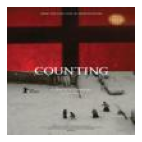

[0. 1.]
Documentary


In [15]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [16]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0

In [17]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [18]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
7/7 [==============================] - 6s 770ms/step - loss: 0.8041 - accuracy: 0.4983 - val_loss: 0.6898 - val_accuracy: 0.5388
Epoch 2/5
7/7 [==============================] - 5s 765ms/step - loss: 0.6850 - accuracy: 0.5865 - val_loss: 0.6818 - val_accuracy: 0.5525
Epoch 3/5
7/7 [==============================] - 5s 752ms/step - loss: 0.6684 - accuracy: 0.5865 - val_loss: 0.6832 - val_accuracy: 0.5342
Epoch 4/5
7/7 [==============================] - 6s 918ms/step - loss: 0.6372 - accuracy: 0.6506 - val_loss: 0.6488 - val_accuracy: 0.6073
Epoch 5/5
7/7 [==============================] - 5s 779ms/step - loss: 0.6038 - accuracy: 0.6770 - val_loss: 0.6162 - val_accuracy: 0.6347


In [19]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
7/7 [==============================] - 5s 782ms/step - loss: 0.5670 - accuracy: 0.7010 - val_loss: 0.5898 - val_accuracy: 0.6667
Epoch 2/5
7/7 [==============================] - 5s 762ms/step - loss: 0.5174 - accuracy: 0.7503 - val_loss: 0.5900 - val_accuracy: 0.6667
Epoch 3/5
7/7 [==============================] - 5s 778ms/step - loss: 0.4918 - accuracy: 0.7686 - val_loss: 0.5428 - val_accuracy: 0.7671
Epoch 4/5
7/7 [==============================] - 5s 767ms/step - loss: 0.4335 - accuracy: 0.8110 - val_loss: 0.5295 - val_accuracy: 0.7671
Epoch 5/5
7/7 [==============================] - 5s 774ms/step - loss: 0.4158 - accuracy: 0.8121 - val_loss: 0.5008 - val_accuracy: 0.7215


(122, 2)


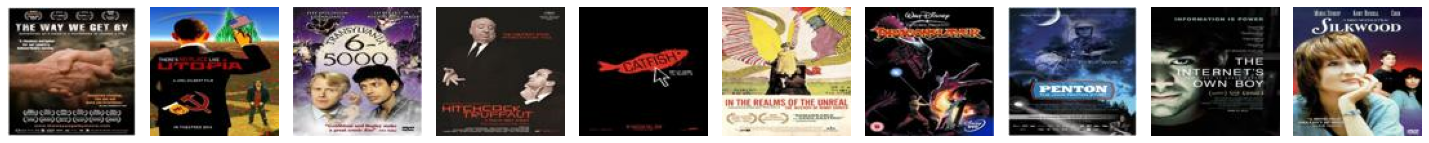

[0.33774033 0.6622597 ]
1
Genre is Documentary Predicted is Documentary ([0.33774033 0.6622597 ])
Genre is Documentary Predicted is Documentary ([0.263385   0.73661494])
Genre is Not Documentary Predicted is Not Documentary ([0.8773724  0.12262766])
Genre is Documentary Predicted is Documentary ([0.36302632 0.6369737 ])
Genre is Documentary Predicted is Documentary ([0.43805802 0.56194204])
Genre is Documentary Predicted is Documentary ([0.18152022 0.8184798 ])
Genre is Not Documentary Predicted is Not Documentary ([0.86863005 0.13136996])
Genre is Documentary Predicted is Documentary ([0.10481678 0.8951832 ])
Genre is Documentary Predicted is Documentary ([0.36386624 0.63613373])
Genre is Not Documentary Predicted is Not Documentary ([0.9459982  0.05400182])


In [20]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [21]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

4/4 [==============================] - 0s 35ms/step - loss: 0.4474 - accuracy: 0.7951
Test Loss: 44.74%
Test Accuracy:  79.51%


In [22]:
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [23]:
model.save_weights(checkpoint_path)

In [24]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'../Weights/Documentary\\cp.ckpt'

In [25]:
# Loads the weights
model.load_weights(checkpoint_path)

In [26]:
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 0s - loss: 0.4474 - accuracy: 0.7951 - 156ms/epoch - 39ms/step
Restored model, accuracy: 79.51%
